In [8]:
from stable_baselines3.common.monitor import load_results, get_monitor_files
import os
import matplotlib.pyplot as plt
from typing import List

In [2]:
train_dir = "cell2fire/train_logs"

In [3]:
experiment_name = "algo=ppo-maskable__ignition_type=random__map=Sub20x20__architecture=CnnPolicy__action_space=flat__seed=0__acr=2__gamma=0.9__2022-05-01_15-22-58"

# Guide
- index = episode index
- r = episode reward
- l = episode length
- t = time elapsed
- s = steps, by cumulative summing the episode lengths

In [14]:
results_dir = os.path.join(train_dir, experiment_name)
print(f"Found {len(get_monitor_files(results_dir))} monitor files to get results from")

Found 16 monitor files to get results from


In [15]:
df_results = load_results(results_dir)
df_results["s"] = df_results["l"].cumsum()
print("Shape:", df_results.shape)
df_results.head()

Shape: (1753, 5)


,index,r,l,t,s
0,0,-1.950,18,2.338764,18
1,0,-2.950,56,2.577760,74
2,0,-30.875,58,2.603142,132
3,0,-67.350,58,2.603740,190
4,0,-86.825,58,2.603849,248


In [16]:
def smooth(
    scalars: List[float], weight: float
) -> List[float]:  # Weight between 0 and 1
    # https://stackoverflow.com/a/49357445
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)  # Save it
        last = smoothed_val  # Anchor the last smoothed value

    return smoothed

Text(0.5, 1.0, 'Reward Curve')

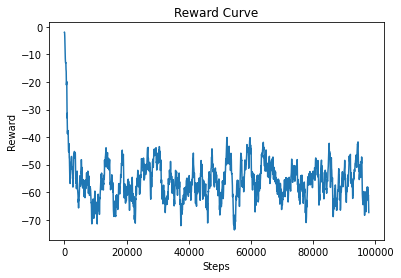

In [17]:
plt.plot(df_results["s"], smooth(df_results["r"], 0.95))
plt.xlabel("Steps")
plt.ylabel("Reward")
plt.title("Reward Curve")